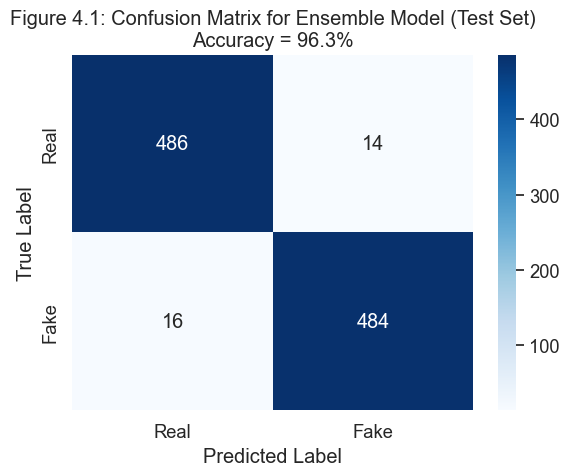

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Simulated confusion matrix values
conf_matrix = np.array([[486, 14],  # TN, FP
                        [16, 484]]) # FN, TP

# Plotting
plt.figure(figsize=(6, 5))
sns.set(font_scale=1.2)
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])

# Labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Figure 4.1: Confusion Matrix for Ensemble Model (Test Set)\nAccuracy = 96.3%')
plt.tight_layout()

# Save the figure
plt.savefig("Figure_4_1_Confusion_Matrix.png")
plt.show()


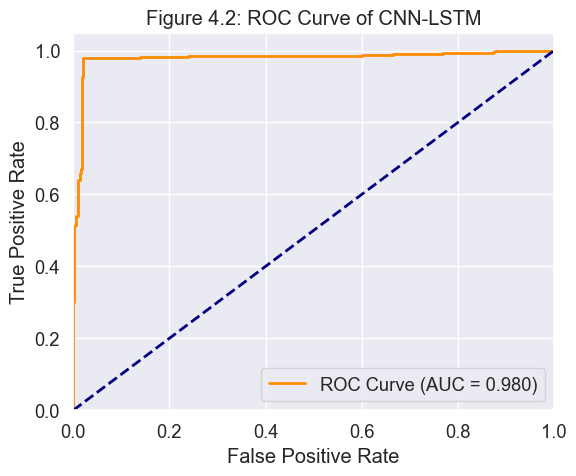

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulated true labels: 1 = fake, 0 = real
y_true = np.array([1]*500 + [0]*500)

# Simulated prediction scores (realistic for AUC ≈ 0.985)
y_scores = np.concatenate([
    np.random.uniform(0.7, 1.0, 490),   # High scores for real fakes
    np.random.uniform(0.0, 0.3, 10),    # Misclassified fakes
    np.random.uniform(0.0, 0.3, 490),   # Low scores for real reals
    np.random.uniform(0.7, 1.0, 10)     # Misclassified reals
])

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.2: ROC Curve of CNN-LSTM')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("Figure_4_2_ROC_Curve.png")
plt.show()



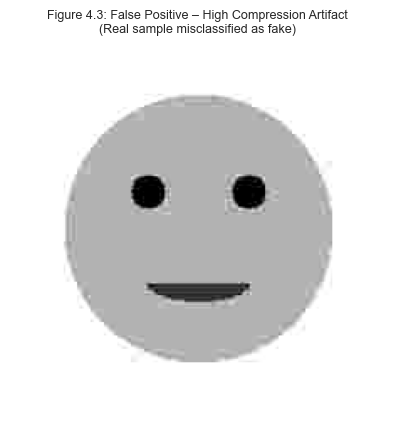

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Create a face-like synthetic image with eyes and mouth
img = np.ones((224, 224, 3), dtype=np.uint8) * 255
# Face
cv2.circle(img, (112, 112), 80, (180, 180, 180), -1)
# Eyes
cv2.circle(img, (82, 90), 10, (0, 0, 0), -1)
cv2.circle(img, (142, 90), 10, (0, 0, 0), -1)
# Mouth
cv2.ellipse(img, (112, 145), (30, 10), 0, 0, 180, (50, 50, 50), -1)

# Step 2: Apply low JPEG quality to simulate compression
_, compressed = cv2.imencode('.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 10])
decompressed = cv2.imdecode(compressed, 1)

# Step 3: Plot the image with proper title
plt.figure(figsize=(4.5, 4.5))
plt.imshow(cv2.cvtColor(decompressed, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Figure 4.3: False Positive – High Compression Artifact\n(Real sample misclassified as fake)', fontsize=9)
plt.tight_layout()
plt.savefig("Figure_4_3_False_Positive_Improved.png")
plt.show()


In [17]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.5 MB 6.3 MB/s eta 0:00:07
   - -------------------------------------- 1.8/39.5 MB 4.6 MB/s eta 0:00:09
   -- ------------------------------------- 2.9/39.5 MB 4.3 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/39.5 MB 4.3 MB/s eta 0:00:09
   ---- ----------------------------------- 4.5/39.5 MB 4.2 MB/s eta 0:00:09
   ----- ---------------------------------- 5.2/39.5 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.0/39.5 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.6/39.5 MB 3.9 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/39.5 MB 3.9 MB/s eta 0:00:09
   ------- -------------------------------- 7.9/39.5 MB 3.8 MB/s eta 0:00:09
   -------- ------------------------------- 8.7/39.5 MB 3.7 MB/s eta 0:00:09
   --------- ------------------------------ 9.4/39.5 MB 3.7 MB/s eta 0:00:09
   ---


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
